# Temporal-Difference Prediction (TD(0))
- Algorithms from ```pp. 97 - 105``` in Sutton & Barto 2017

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn, random

from gridWorldEnvironment import GridWorld

In [2]:
# creating gridworld environment
gw = GridWorld(gamma = .9, theta = .5)

### Generate value array

In [3]:
def value_array(env):
    return np.zeros(len(env.states)+2)

### Generate policy

In [4]:
def generate_any_policy(env):
    pi = dict()
    for state in env.states:
        r = sorted(np.random.sample(3))
        actions = env.actions
        prob = [r[0], r[1] - r[0], r[2] - r[1], 1-r[2]]
        pi[state] = (actions, prob)
    return pi   

### Generate episode
- Generate stochastic (non-deterministic) episode, given current policy $\pi$

In [6]:
def generate_episode(env, s0, a0, policy):
    episode = []
    done = False
    current_state, action = s0, a0
    episode.append((current_state, action, -1))
    
    while not done:
        next_state, reward = gw.state_transition(current_state, action)
        pr = policy[current_state][1]
        ## to make non-deterministic episode (mostly to avoid infinite episode due to greediness)
        pr[np.argmax(pr)] -= .2
        pr[np.random.choice(np.delete(np.arange(4), np.argmax(pr)))] += .1
        pr[np.random.choice(np.delete(np.arange(4), np.argmax(pr)))] += .05
        pr[np.random.choice(np.delete(np.arange(4), np.argmax(pr)))] += .05
        ##
        action = np.random.choice(policy[current_state][0], p = pr)
        episode.append((next_state, action, reward))
        
        if next_state == 0:   
            done = True
        current_state = next_state
    return episode[:-1]

In [7]:
pi = generate_any_policy(gw)
generate_episode(gw, 1, "U", pi)

[(1, 'U', -1), (1, 'L', -1)]

### Tabular TD(0)
- Estimates $v_\pi$, given current policy $\pi$

In [1]:
# alpha corresponds to learning rate (i.e., step size)
def tabular_td(env, alpha, num_iter):
    V = value_array(env)
    pi = generate_any_policy(env)
    
    for _ in range(num_iter):
        s0, a0 = np.random.choice(env.states), np.random.choice(env.actions)
        episode = generate_episode(env, s0, a0, pi)
        already_visited = set()
        
        for step in range(len(episode)):
            current_state, action = episode[step][0], episode[step][1]
            next_state, reward = env.state_transition(current_state, action)
            V[current_state] += alpha * (reward + env.gamma * V[next_state] - V[current_state])            
    return V

In [9]:
values = tabular_td(gw, .5, 100)

In [10]:
def show_values(values):
    values = values.reshape(4,4)
    ax = seaborn.heatmap(values, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
    plt.show()

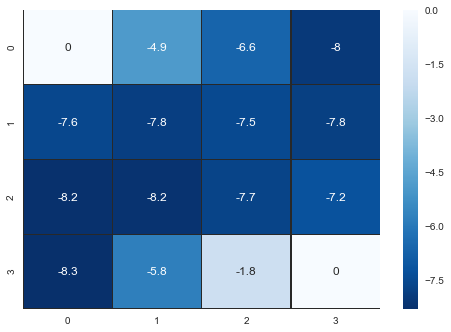

In [11]:
show_values(values)